In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
df= pd.read_csv("C:/Users/trinity/Downloads/arpithaphd/winequality-red.txt")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

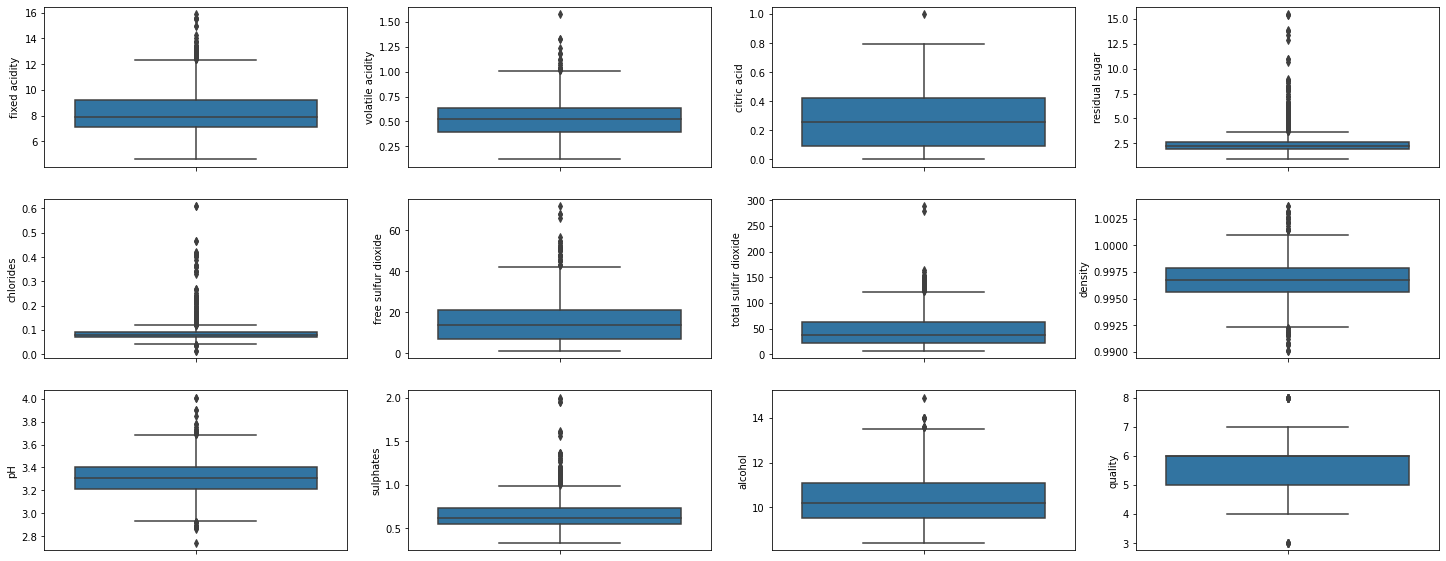

In [3]:
# checking for outliers
plt.figure(figsize=(25,10))
for i,col in enumerate(df[:], start=1):
    plt.subplot(3,4,i)
    sns.boxplot(y=col, data=df)
plt.show()   

    
    

    
    
    

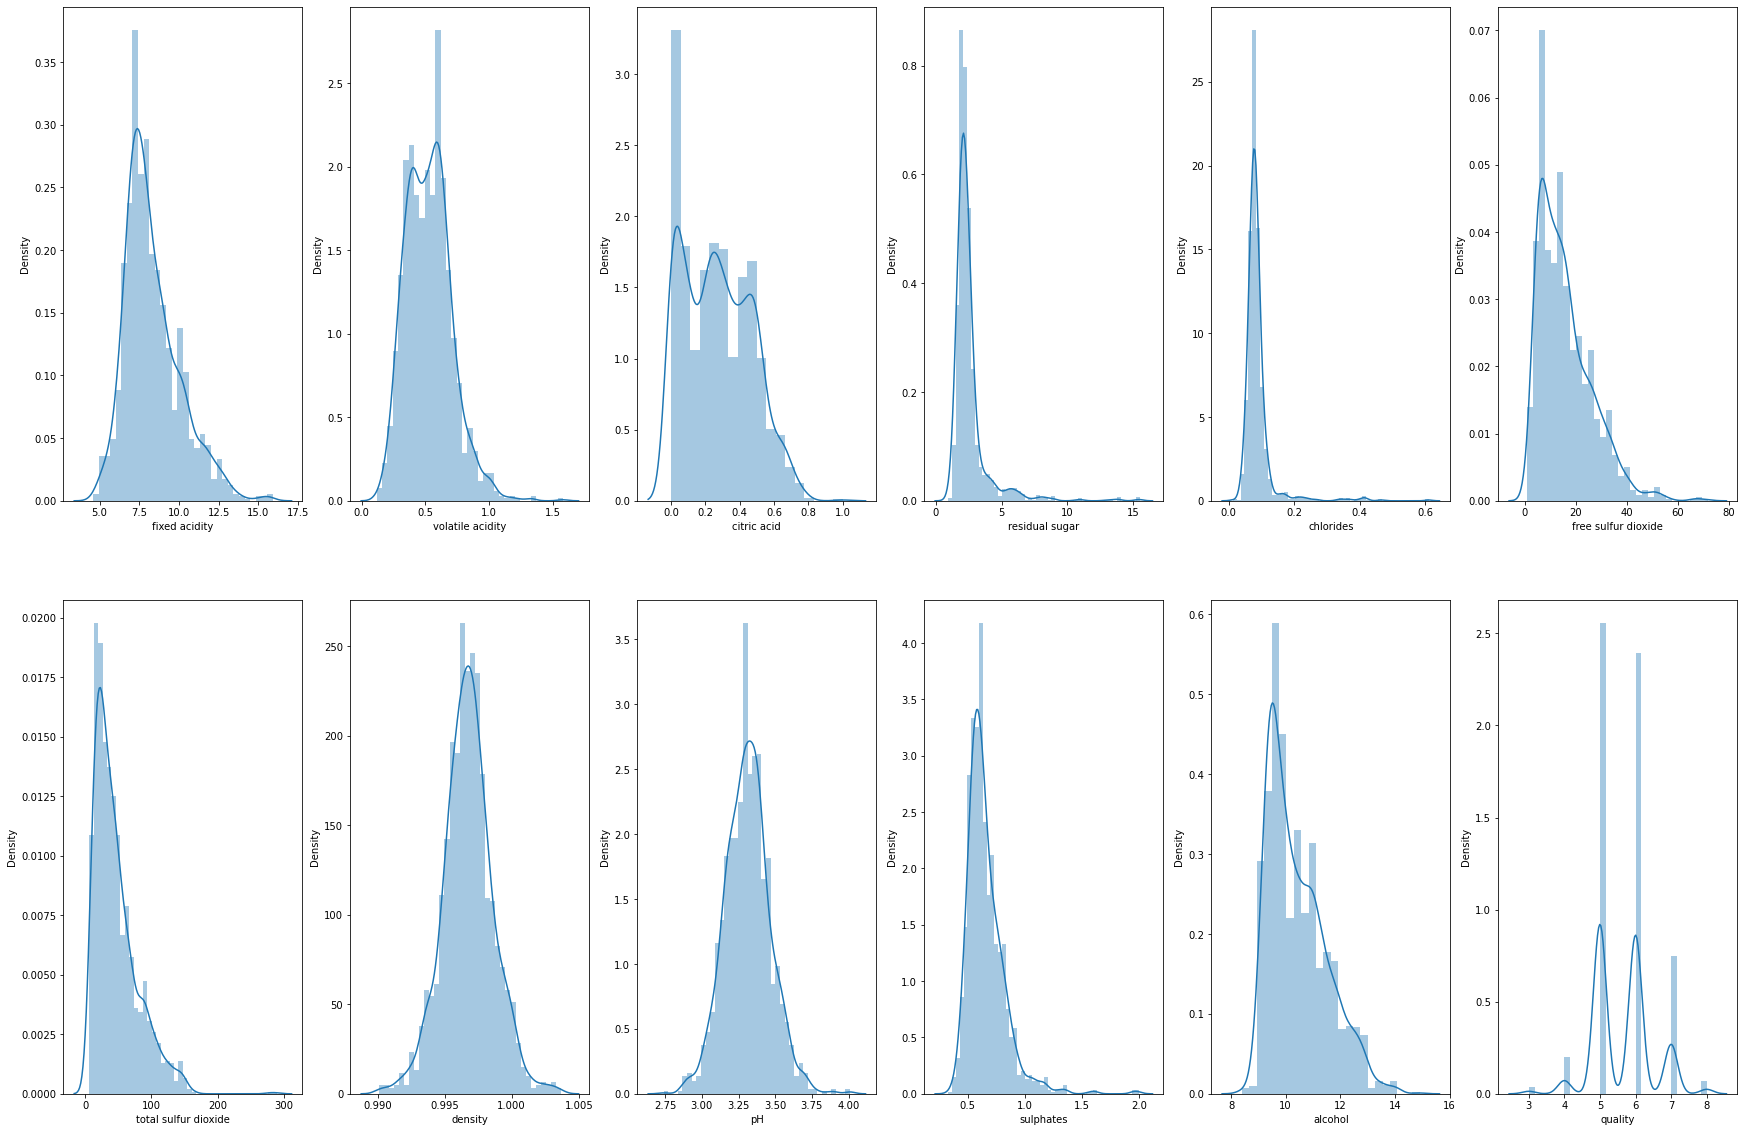

In [4]:
#create distribution plot
plt.figure(figsize=(30,20))
for i,col in enumerate(df[:], start=1):
    plt.subplot(2,6,i)
    sns.distplot(df[col])
plt.show()   


In [5]:
# log transformation
df["residual sugar"]=np.log(1+df["residual sugar"])
df["chlorides"]=np.log(1+df["chlorides"])
df["free sulfur dioxide"]= np.log(1+df["free sulfur dioxide"])
df["total sulfur dioxide"]= np.log(1+df["total sulfur dioxide"])


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

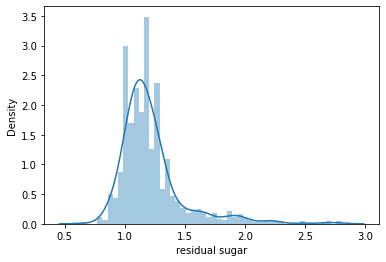

In [6]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

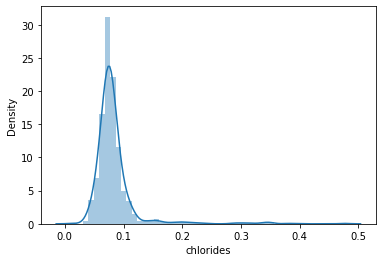

In [7]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

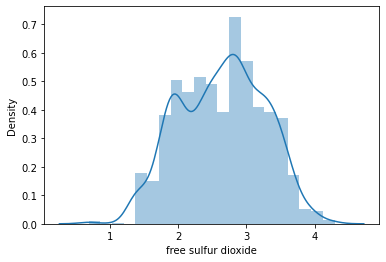

In [8]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='quality', ylabel='count'>

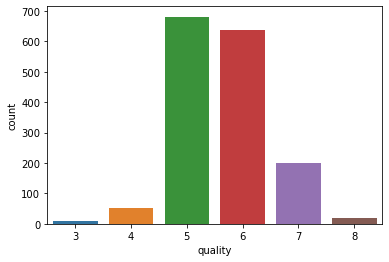

In [9]:
sns.countplot(df["quality"])

<AxesSubplot:>

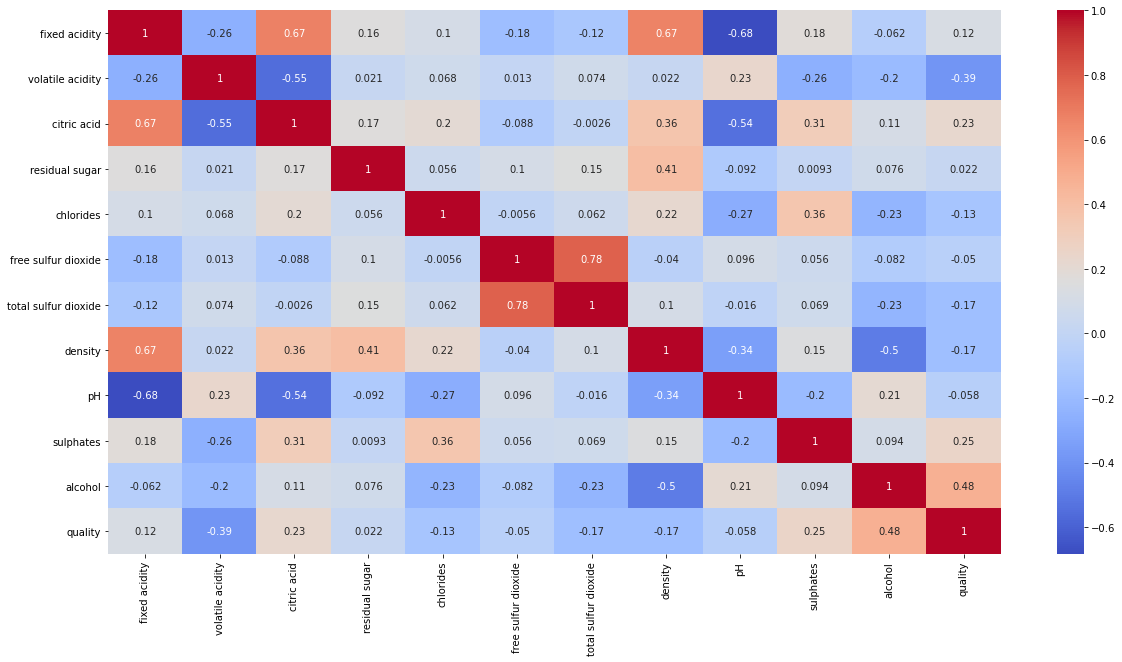

In [10]:
corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot= True, cmap="coolwarm")


In [11]:
X= df.drop(columns=["quality","free sulfur dioxide","density"])
y=df["quality"]


In [12]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#pip install imblearn


In [14]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE(k_neighbors=4)
#transforming the data set
(X, y) = oversample.fit_resample(X,y)


In [15]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [16]:
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,X,y):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #train model
     model.fit(X_train,y_train)
     print("Accuracy: ",model.score(X_test,y_test)*100)
    
    #cross validation
     score= cross_val_score(model, X, y, cv=5)
     print("cross_validation: ", np.mean(score)*100)

In [17]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,y)

Accuracy:  50.97799511002445
cross_validation:  50.95459265665727


In [18]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,X,y)

Accuracy:  79.95110024449878
cross_validation:  74.49856802123578


In [19]:
#pip install ensemble

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier()
classify(model,X,y)

Accuracy:  86.55256723716381
cross_validation:  82.45217011369043


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model,X,y)

Accuracy:  88.26405867970661
cross_validation:  83.30845451035904


In [22]:
#pip install xgboost

In [24]:
import xgboost as xgb
model=xgb.XGBClassifier()
classify(model,X,y)

[23:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  86.06356968215158
[23:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:12] WARNING: C:/Users/Administr